In [137]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import *

In [138]:
%matplotlib inline

In [139]:
# These options are set so that dataframes can display all the rows
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [140]:
# This is the master csv which contains the total cases for each day, sorted by state
df = pd.read_csv('us-states.csv')

In [141]:
# This is the csv that contains the population of the states
popDF = pd.read_csv('population.csv',index_col='state' )

In [142]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

In [143]:
# This creates separate dictionaries 
dictList = {key:{} for key in states}
# This creates lists for the states 
casesList = {key: [] for key in states}
# This DataFrame will contain the date, total cases, and changes in cases from day to day for the individual states
stateDataFrame = {key:{} for key in states}

In [144]:
# This DataFrame gets all the results for that particular state and adds it to its own dictionary
for state in states:
    stateFilter = (df['state']==state)
    dictList[state]= df[stateFilter]
    dictList[state].reset_index(inplace=True)

In [145]:
# This fuinction changes the date to a python date
def changeDate(aDate):
    aDate = datetime.strptime(aDate, '%Y-%m-%d')
    finalDate = aDate.date()
    return finalDate

In [146]:
# This function gets the date of the first case
def getFirstEvent(name):
    result = dictList[name].loc[0, 'date']
    return result

In [147]:
# This function returns the number of days between the first case and the first death
def caseToDeath(state):
    minList = []
    # We want to find the date of the first death so it has to be greater than 0, if we append it to a list,
    # then we can get the first value and that will be the date of the first death
    for ind, row in dictList[state].iterrows():
        if row[5] > 0:
            minList.append(row[1])
    firstDeath = minList[0]
    firstCaseDate = getFirstEvent(state)
    # change the dates to datetime objects to be able to get difference between first death date and first case date
    firstDeathDate = changeDate(firstDeath)
    firstCaseDate = changeDate(firstCaseDate)
    daysInBetween = firstDeathDate - firstCaseDate
    daysInBetween = daysInBetween.days

    return daysInBetween

In [148]:
# This function returns the number of events for a particular date
def eventsOnDate(state, date,event):
    dictList[state].reset_index(inplace=True)
    dictList[state].set_index('date',inplace=True)
    if event == 'cases':
        result = dictList[state].loc[date,'cases']
    elif event == 'deaths':
        result = dictList[state].loc[date,'deaths']
    return result

In [149]:
# This function returns the total number of events between two dates
def casesBetweenDates(state,firstDate,secondDate):
    firstResults = eventsOnDate(state, firstDate,'cases')
    secondResults = eventsOnDate(state, secondDate,'cases')
    firstResults = int(firstResults)
    secondResults = int(secondResults)
    difference = secondResults - firstResults
    return difference

In [150]:
# This function returns the previous date 
def previousDate(date):
    date = changeDate(date)
    dateBefore = date - timedelta(days=1)
    return dateBefore

In [151]:
# This function returns the population for the state
def eventsPerCapita(name):
    stateyDF = dictList[name]
    population = popDF.loc[name,'population']
    lastIndex =  stateyDF.index[-1]
    totalEvents = stateyDF.loc[lastIndex,'cases']
    perHundred = population / 100000
    difference = totalEvents/perHundred
    return difference

In [152]:
# 
def caseChanges(state):
    
    # make it easier to access
    stateDF = dictList[state]
    # Will be used for indexing
    i = 1
    
    # this gets the population for the state
    population = popDF.loc[state,'population']
    
    # To find the cases per Capita we need to divide the population by 100K
    perHundred = population/100000
    
    # This resets the index
    stateDF.reset_index(inplace=True)
    
    # This finds the last index number for the state DF
    otherLastIndex = stateDF.index[-1]
    
    for item in range(otherLastIndex,0,-1):
        
        # The last index
        lastIndex = stateDF.index[-i]
        
        # Date that corresponds to the last index
        lastDate = stateDF.loc[lastIndex,'date']
        
        # Number of cases that correspond to the last date
        lastDateCases = stateDF.loc[lastIndex,'cases']
        
        # Cases per capita for last date
        lastDatePerCapita = lastDateCases/perHundred
        
        # Date for the day before
        dayBefore = stateDF.loc[lastIndex-1,'date']
        
         # The cases for the day before the last index
        previousDayCases = stateDF.loc[(lastIndex-1),'cases']
        
        # Previous day cases per capita
        previousDayPerCapita = previousDayCases/perHundred
        
        # Change between the previous day cases and the last date cases
        difference = lastDateCases - previousDayCases       
        
        # Add to the list that will be transformed into a new DataFrame
        casesList[state].append([lastDate,lastDateCases,lastDatePerCapita,difference])
        #casesList[state].append(dayBefore)
        i+=1
    casesList[state].reverse()
    return difference

In [153]:
for name in states:
    caseChanges(name)

In [154]:
# This creates the states DataFrames using the following column names: 'Date','Total Cases','per Capita', 'Daily Change'
for stateName in states:
    stateDataFrame[stateName]=pd.DataFrame(casesList[stateName],columns=['Date','Total Cases','per Capita','Daily Change'])

stateDataF['Texas']

In [155]:
def findCasesTotal(state,number):
    pass

In [156]:
# This function finds the sum of the new cases for the specified days for the specified state
# Ex. If you want to find out the new cases in the last 5 days for California
# you can do so as: print(lastCoupleDays("California",5))
def lastCoupleDays(state, days):
    daysList = []
    daysDF = stateDataF[state]
    i = 1
    lastIndex = daysDF.index[-1]
    totalDays = lastIndex - days
    for numba in range(lastIndex,totalDays,-1):
        findIndex = daysDF.index[-i]
        allCases = daysDF.loc[findIndex,'Daily Change']
        daysList.append(allCases)
        i+=1
    totalNumber = sum(daysList)
    return totalNumber

In [157]:
def totalCasesUS():
    totalCasesList =  []
    for aState in states:
        lastIndex = stateDataFrame[aState].index[-1]
        totalCases = stateDataFrame[aState].loc[lastIndex, 'Total Cases']
        totalCasesList.append(totalCases)
    total = sum(totalCasesList)
    return total
    

In [158]:
totalCasesPerState = []

In [159]:
for anotherState in states:
    lastIndex = stateDataFrame[anotherState].index[-1]
    totalCases = stateDataFrame[anotherState].loc[lastIndex,'Total Cases']
    totalCasesPerState.append(anotherState)
    totalCasesPerState.append(totalCases)

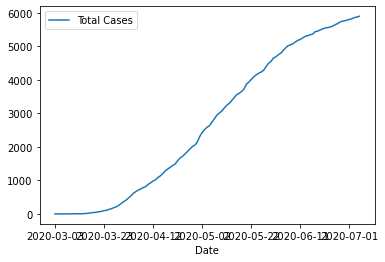

In [160]:
stateDataFrame['New Hampshire'].plot(x='Date', y='Total Cases', kind='line')

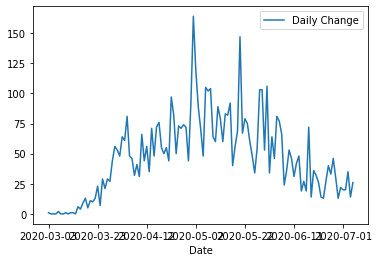

In [161]:
stateDataFrame['New Hampshire'].plot(x='Date', y='Daily Change', kind='line')